# Point Spectrum Toolbox -- Scaled two valued potentials

Example usage:

Start with a periodic potential e.g.
```python
v = [1,1,0,1]
```
Then analyse the eigenvalues given by Hagger's formula
```python
H = build_ev_dict(v)
```
This will yield a dictionary containing all eigenvalues of the cutoff matrix $H_{1..K-2}$, where $K$ is the length of the period.

In the next step, for a given scaling factor l we filter out those eigenvalues of the (finite) cutoff that correspond to eigenvalues of the one sided operator H_+
```python
EV = hagger_filter(H,l)
```

Disclaimer: The implementation below up to now only works for $K \leq 5$.

In [5]:
import csv
import itertools

l = var('l', domain=RR ) #scaling variable 

def cutoff(v,K):
#
# determine the cutoff matrix H_{0..K} with potential v[0:K-1]
#
    A = matrix(SR,K+1,K+1) #start enumerating from 0
    A = A + matrix.toeplitz([0,1] + [0]*(K-1), [1]+[0]*(K-1))
    for k in range(K+1):
        A[k,k] = v[k]
    return A
    
def lim_pots(v):
#
# determine all limit potentials of a given periodic potential v
#
    v_rev = deepcopy(v)
    lim = shift_pots(v)
    v_rev.reverse()
    lim_rev = shift_pots(v_rev)
    for pot in lim_rev:
        if pot not in lim:
            lim.append(pot)
    return lim
    
def shift_pots(v):
#
# determine all shifts of a given periodic potential v
#
    shift = []
    for c in range(len(v)):
        if v not in shift:
            shift.append(v)
        v = right_shift(v)
    return shift
    
def right_shift(a):
    return [a[-1] , *a[:-1]]

def hagger_filter(H,val):
#
# filter out eigenvalues of H_+ from cutoff matrix eigenvalues according to Hagger's 
# formula, given a concrete scaling factor val
#
    E_filt = []
    for E in H:
        print([E.subs(l=val).n(),abs(real(H[E].subs(l=val))).n()])
        if abs(real(H[E].subs(l=val))).n() < 1:
            E_filt.append(real(E.subs(l=val)).n())
        E_filt.sort()
    return E_filt
        
def build_ev_dict(v, H={}):
#
# build dictionary H where keys are given via eigenvalues of a cutoff and values are the determinants
#
    K = len(v)
    vl = list(map(lambda vv: l*vv,v))
    A = cutoff(vl,K-2)   
    EV = A.eigenvalues()
    
    for E in EV:  
        vlE = list(map(lambda vv: vv - E,vl))
        H[E] = det(cutoff(vlE,K-1))   
    return H


def export_csv(EV, outname='points.csv'):
#
# deprecated
#
    f = open(outname, 'w')
    writefile = csv.writer(f)
    for E in EV:
        writefile.writerow([len(EV[E]),E,*tuple(EV[E])])
    f.close()
    
def build_lambda_dict(v,l_list):
#
# for a single potential build an eigenvalue dictionary with
# keys given in the list l_list and values given by the corresponding eigenvalues
#
    EV = {}
    for ll in l_list:
        EV[ll] = hagger_filter(build_ev_dict(v), ll)
    return EV

def build_lambda_dict_from_list(v_list,l_list):
#
# same as build_lambda_dict but with lists of potentials
#
    print('Busy...')
    EV = {}
    for ll in l_list:
        H = {}
        for vv in v_list:
            build_ev_dict(vv,H)
        EV[ll] = hagger_filter(H, ll)
    print('Done.')
    return EV

In [8]:
v = [1,1,0,1]
E = var('E')
vl = list(map(lambda vv: vv*l, v))

A = cutoff(vl, len(v) - 2)
EV = A.eigenvalues()
print(len(EV))

vlE = list(map(lambda vv: vv*l - E, v))
d = det(cutoff(vlE, len(v) - 1))
for EE in EV:
    print(d.subs(E=EE).subs(l=1).n(1000))

3
0.801937735804838252472204639014890102331838324263714300107124846398864840855879931002722909437024830636621928737350207279583265761160274507578725341441603968541079412608849689622406746300285646796575866095349558808762214124530764626234212107218362486435309913639097607483678183846111431078696872698323 - 6.08498298944002479370447869359680026483916959103336942072674907077243100091394496053469460340396430403583776331923503229559650185721724166961068928280616876028858418627864269565758127976381975781663917950484289404913490458882526734784096905258200838125586355549091246050309590924436397933283352644330e-301*I
-2.24697960371746706105000976800847962126454946179280421073109887819370730491297456915188501465317074333411618441834908601827145851077314552166879576912740097140591968089743979556382629524585824835538573600608852711069484328712618661597263919111820319001677556608150519110212142596596682899966662472928 + 5.72883930903021337686320736813213512628017521240491189938760390783810353357397

In [51]:
v = [1,1,0,1]

f= open('K4_lambda.csv', 'r')
csv_reader = csv.reader(f) 
l_list = list(map(lambda ll: float(ll), list(csv_reader)[0]))
f.close()

export_csv(build_lambda_dict_from_list(lim_pots(v), l_list), 'K4_points.csv')

Busy...
[0.00500006249921863, 0.999975000624988]
[-1.40672464217824 - 5.55111512312578e-17*I, 1.00710871175507]
[1.42172457967902 - 5.55111512312578e-17*I, 0.992966288869918]
[-1.40922240118024, 1.00000000000000]
[1.41922240118024, 1.00000000000000]
[0.000000000000000, 1.00000000000000]
[0.00499993750078098, 1.00002500000000]
[-1.41172457967902, 1.00708353466671]
[1.41672464217824, 0.992941465333288]
[0.0100004999749999, 0.999900009999250]
[-1.39925800672765 - 5.55111512312578e-17*I, 1.01429328966055]
[1.42925750675265, 0.986006720338702]
[-1.40424891727022, 1.00000000000000]
[1.42424891727022, 1.00000000000000]
[0.000000000000000, 1.00000000000000]
[0.00999950002500003 - 2.22044604925031e-16*I, 1.00009999999975]
[-1.40925750675265 + 1.66533453693773e-16*I, 1.01419187047375]
[1.41925800672765 - 5.55111512312578e-17*I, 0.985908129525996]
[0.0150016873101562 + 1.11022302462516e-16*I, 0.999775050616458]
[-1.39181384389678 - 1.66533453693773e-16*I, 1.02155460669654]
[1.43681215658663 - 5.5

[0.100497500185319, 0.990099252530629]
[-1.26888354783993 - 1.66533453693773e-16*I, 1.15761887711482]
[1.56838604765461, 0.872480375415808]
[-1.31774468787578, 1.00000000000000]
[1.51774468787578, 1.00000000000000]
[0.000000000000000, 1.00000000000000]
[0.0995024998146811, 1.00999975249357]
[-1.36838604765461 - 5.55111512312578e-17*I, 1.14615758494673]
[1.46888354783993 - 1.11022302462516e-16*I, 0.863842167546835]
[0.105575622083238 - 1.11022302462516e-16*I, 0.989095549296697]
[-1.26187597660914 + 5.55111512312578e-17*I, 1.16641889051910]
[1.57630035452590 - 5.55111512312578e-17*I, 0.866776658777596]
[-1.31310613143023, 1.00000000000000]
[1.52310613143023, 1.00000000000000]
[0.000000000000000, 1.00000000000000]
[0.104424377916761 + 1.11022302462516e-16*I, 1.01102466865922]
[-1.36630035452590, 1.15369973322803]
[1.47187597660914, 0.857324935431183]
[0.110661474160896, 0.988045086767332]
[-1.25489442107557, 1.17531355331984]
[1.58423294691467 - 5.55111512312578e-17*I, 0.861131533447493]


[0.198637022932899, 0.963380211008016]
[-1.14035867120485 + 5.55111512312578e-17*I, 1.34199766253186]
[1.72172164827195, 0.773482548476152]
[-1.23259412999634, 1.00000000000000]
[1.62259412999634, 1.00000000000000]
[0.000000000000000, 1.00000000000000]
[0.191362977067101, 1.03801177206419]
[-1.33172164827195, 1.29285399130221]
[1.53035867120485, 0.745157780761974]
[0.203920091576919 + 2.22044604925031e-16*I, 0.961552669512796]
[-1.13387501666460 - 5.55111512312578e-17*I, 1.35277256674782]
[1.72995492508768 - 5.55111512312578e-17*I, 0.768780102764974]
[-1.22828568570857, 1.00000000000000]
[1.62828568570857, 1.00000000000000]
[0.000000000000000, 1.00000000000000]
[0.196079908423081 + 1.11022302462516e-16*I, 1.03998463288203]
[-1.32995492508768 - 5.55111512312578e-17*I, 1.30076207280005]
[1.53387501666460, 0.739222560081983]
[0.209217163934498, 0.959686252741494]
[-1.12742056228761 + 1.11022302462516e-16*I, 1.36366198534474]
[1.73820339835311, 0.764124267396749]
[-1.22399440166853, 1.0000

[0.301684182281271 + 1.11022302462516e-16*I, 0.922540305607555]
[-1.02229543739194, 1.56735066868702]
[1.88061125511067, 0.691589636920540]
[-1.15364122966892, 1.00000000000000]
[1.73364122966892, 1.00000000000000]
[0.000000000000000, 1.00000000000000]
[0.278315817718729 + 1.11022302462516e-16*I, 1.08396347988442]
[-1.30061125511067 - 1.11022302462516e-16*I, 1.44594416488472]
[1.60229543739194 - 1.11022302462516e-16*I, 0.638019314999693]
[0.307280513070565 - 1.11022302462516e-16*I, 0.920069691710357]
[-1.01638920849737 + 1.11022302462516e-16*I, 1.58048628917681]
[1.88910869542681 + 5.55111512312578e-17*I, 0.687683402533542]
[-1.14965393779964, 1.00000000000000]
[1.73965393779964, 1.00000000000000]
[0.000000000000000, 1.00000000000000]
[0.282719486929435 + 1.11022302462516e-16*I, 1.08687418899872]
[-1.29910869542681 + 1.11022302462516e-16*I, 1.45415753283536]
[1.60638920849737 - 5.55111512312578e-17*I, 0.632716656163365]
[0.312895815303755, 0.917571187129904]
[-1.01051449682732 - 5.5511

KeyboardInterrupt: 

In [3]:
v = [0,1,1,0,1]

f= open('K4_lambda.csv', 'r')
csv_reader = csv.reader(f) 
l_list = list(map(lambda ll: float(ll), list(csv_reader)[0]))
f.close()

export_csv(build_lambda_dict_from_list(lim_pots(v), l_list), 'K5_points.csv')

Busy...
Done.


In [32]:
def build_ev_dict_num_w_hagger(v, val, H={}):
#
# build dictionary H where keys are given via eigenvalues of a cutoff and values are the determinants
#
    K = len(v)
    vl = list(map(lambda vv: val*vv,v))
    A = cutoff_real(vl,K-2)   
    p = SR(A.characteristic_polynomial())
    EV = list(map(lambda s: real(s.rhs().n(100)), solve(p == 0, x, to_poly_solve="true")))
    print(EV)
    E_filt = []
    for E in EV:
        vlE = list(map(lambda vv: vv - E,vl))
        if abs(det(cutoff_real(vlE,K-1))) < 1:
            print(abs(det(cutoff_real(vlE,K-1))).n(100))
            E_filt.append(real(E.n()))
        E_filt.sort()
    return E_filt

def cutoff_real(v,K):
#
# determine the cutoff matrix H_{0..K} with potential v[0:K-1]
#
    A = matrix(K+1,K+1) #start enumerating from 0
    A = A + matrix.toeplitz([0.0,1.0] + [0.0]*(K-1), [1.0]+[0.0]*(K-1))
    for k in range(K+1):
        A[k,k] = v[k]
    return A



In [166]:
#v = [1,1,0,1,0]
#v = [1,1,0,1,0,1,0,1,1]
v = [1,1,0,1]

E = var('E')
x = var('x')
vl = list(map(lambda vv: vv*l, v))
vlE = list(map(lambda vv: vv*l - E, v))
p11 = sum([b*E^a for (a,b) in enumerate(cutoff(vl,len(v)-2).charpoly())])
p22 = sum([b*E^a for (a,b) in enumerate(cutoff(vl,len(v)-1).charpoly())])

roots = list(map(lambda s: s.rhs(), solve(p11.subs(l=l_val) ==0, E, to_poly_solve='true')))

for r in roots:
    print([r.n(), abs(real(p22.subs(l=l_val).subs(x=r).n(1000))) ])
    if (abs(real(p22.subs(l=l_val).subs(x=r).n(1000))) < 1):
        print('small')

TypeError: cannot evaluate symbolic expression numerically

In [164]:
#v = [0,1,1,0,1]
#v = [1,1,0,1,0,1,0,1,1]
#v = [l,l,0,l]
#v = [0,1,1,0,1]
v = [1,1,0,1]


E = var('E')
x = var('x')
l = var('l')

vl = list(map(lambda vv: vv*l, v))
vlE = list(map(lambda vv: vv*l - E, v))
p11 = sum([b*E^a for (a,b) in enumerate(cutoff(vl,len(v)-2).charpoly())])
p22 = sum([b*E^a for (a,b) in enumerate(cutoff(vl,len(v)-1).charpoly())])
print(list(map(lambda ss: real(ss.rhs().n()), solve(p22.subs(l=0) == 1, E))))

sp11 = solve(p11.subs(l=0) == 0, E)
print(list(map(lambda ss: real(ss.rhs().n()), sp11)))

[-1.73205080756888, 1.73205080756888, 0.000000000000000]
[-1.41421356237310, 1.41421356237310, 0.000000000000000]


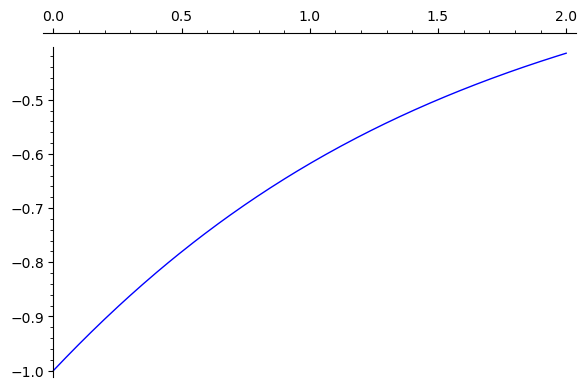

In [155]:
s = sp11[3].rhs()

p22E = p22.subs(E = s)

plot(p22E, (l,0,2))

In [144]:
solve( x > 0, x)

[[x > 0]]

In [86]:
s = solve(p11 == 0, E)
print(ss)
t = -1/3*(1/2)^(2/3)*((2*l + 1)^2 - 3*l^2 - 3*l + 6)*(-I*sqrt(3) + 1)/(2*(2*l + 1)^3 - 9*(l^2 + l - 2)*(2*l + 1) + 3*sqrt(3)*(I*l^2 + I*l + 7*I) - 54*l - 27)^(1/3) - 1/6*(1/2)^(1/3)*(2*(2*l + 1)^3 - 9*(l^2 + l - 2)*(2*l + 1) + 3*sqrt(3)*(I*l^2 + I*l + 7*I) - 54*l - 27)^(1/3)*(I*sqrt(3) + 1) + 2/3*l + 1/3
print(t.subs(l=1).n())
for ss in s:
    print(ss.rhs().subs(l=1).n())

[
E == -1/3*(1/2)^(2/3)*((2*l + 1)^2 - 3*l^2 - 3*l + 6)*(-I*sqrt(3) + 1)/(2*(2*l + 1)^3 - 9*(l^2 + l - 2)*(2*l + 1) + 3*sqrt(3)*(I*l^2 + I*l + 7*I) - 54*l - 27)^(1/3) - 1/6*(1/2)^(1/3)*(2*(2*l + 1)^3 - 9*(l^2 + l - 2)*(2*l + 1) + 3*sqrt(3)*(I*l^2 + I*l + 7*I) - 54*l - 27)^(1/3)*(I*sqrt(3) + 1) + 2/3*l + 1/3,
E == -1/3*(1/2)^(2/3)*((2*l + 1)^2 - 3*l^2 - 3*l + 6)*(I*sqrt(3) + 1)/(2*(2*l + 1)^3 - 9*(l^2 + l - 2)*(2*l + 1) + 3*sqrt(3)*(I*l^2 + I*l + 7*I) - 54*l - 27)^(1/3) - 1/6*(1/2)^(1/3)*(2*(2*l + 1)^3 - 9*(l^2 + l - 2)*(2*l + 1) + 3*sqrt(3)*(I*l^2 + I*l + 7*I) - 54*l - 27)^(1/3)*(-I*sqrt(3) + 1) + 2/3*l + 1/3,
E == 2/3*(1/2)^(2/3)*((2*l + 1)^2 - 3*l^2 - 3*l + 6)/(2*(2*l + 1)^3 - 9*(l^2 + l - 2)*(2*l + 1) + 3*sqrt(3)*(I*l^2 + I*l + 7*I) - 54*l - 27)^(1/3) + 2/3*l + 1/3*(1/2)^(1/3)*(2*(2*l + 1)^3 - 9*(l^2 + l - 2)*(2*l + 1) + 3*sqrt(3)*(I*l^2 + I*l + 7*I) - 54*l - 27)^(1/3) + 1/3,
E == -1/3*(1/2)^(2/3)*((2*l - 1)^2 - 3*l^2 + 3*l + 6)*(-I*sqrt(3) + 1)/(2*(2*l - 1)^3 - 9*(l^2 - l - 2)*(2*l

In [81]:
@interact
def _(ll=slider(0,2,step_size=0.1,default=1)):
    
    plot(p22.subs(l=ll) + 1, (x, -2, 4), ymin=-5,ymax=5).show()

Interactive function <function _ at 0x7fb4a0872670> with 1 widget
  ll: TransformFloatSlider(value=1.0, descri…

In [1]:
v = [0,1,1,0,1]
#v = [1,1,0,1]

E = var('E')
x = var('x')
vl = list(map(lambda vv: vv*l, v))
vlE = list(map(lambda vv: vv*l - E, v))
p11 = cutoff(vl,len(v)-2).charpoly()
p22 = cutoff(vl,len(v)-1).charpoly()

print(p11)

roots = solve(p11.subs(l=1) == 0, x)

for r in p11.roots():
    #print(r[0])
    if abs(real(p22.subs(x=r[0]).subs(l=1).n(1000)))< 1:
        print(real(r[0].subs(l=1).n(1000)))
        print("---")

NameError: name 'l' is not defined

In [2]:
var('l')
var('E')
A=matrix([[l,-1,2],[-1,1,2],[2,2,-2]])

poly=A.characteristic_polynomial()
print(poly)

expression = sum([b*E^a for (a,b) in enumerate(poly)])
es = expression.subs(l=1)
solve(es == 0, E)

x^3 + (-l + 1)*x^2 + (-l - 11)*x + 6*l + 10


[E == -4, E == 2]

In [116]:
E = var('E', domain='real')
print(p11.parent())
R.<E> = PolynomialRing(RR)
p11R = R(p11.subs(l=1))
print(p11R.parent())
solve(p11R ==0, E)

Univariate Polynomial Ring in x over Symbolic Ring
Univariate Polynomial Ring in E over Real Field with 53 bits of precision


TypeError: E is not a valid variable.

In [46]:
l,E = var('l E')
v = [0,1,1,0,1]
vlE =  list(map(lambda vv: l*vv - E,v))
A = cutoff(vlE,len(v)-2)

In [47]:
det(A)

-E^2 + E*l + 1